In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_digits()
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X = data['data']
y = data['target']
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.33, random_state=42)


In [5]:
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
n = 1797
d = 64

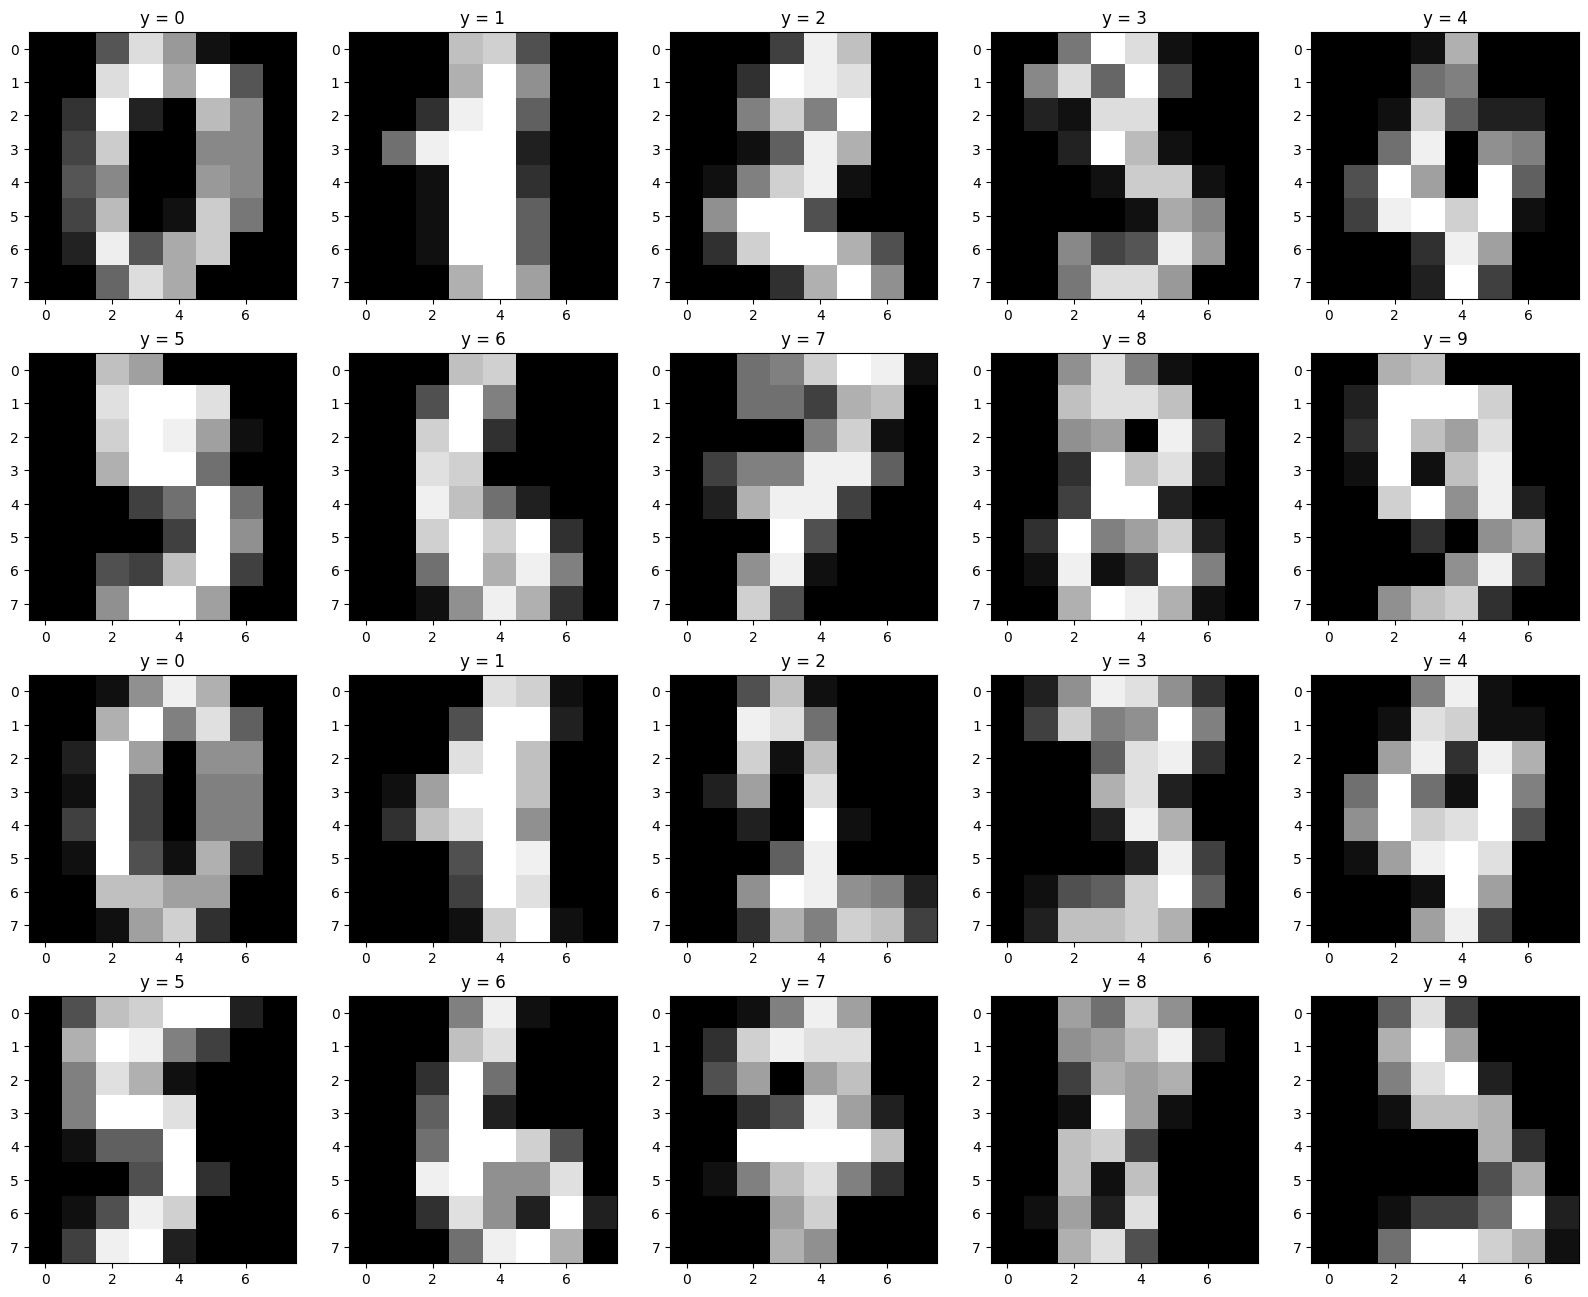

In [7]:
def draw_sample_label(X: np.ndarray , y: np.ndarray, size: int = 20, yred: np.ndarray = None):
    row = size // 5 if size % 5 == 0 else size // 5 + 1
    plt.subplots(row, 5, figsize=(20, 16))
    for i in range(size):
        plt.subplot(row, 5, i + 1)
        plt.imshow(X[i].reshape(8, 8), cmap='gray')
        if yred is None:
            plt.title(f'y = {y[i]}')
        else:
            plt.title(f'y = {y[i]}; yred = {yred[i]}')

draw_sample_label(X, y)

In [8]:
clf = LogisticRegression(max_iter=10000)
clf.fit(xtr, ytr)

LogisticRegression(max_iter=10000)

In [9]:
ypred = clf.predict(xte)

In [10]:
print(f"error rate: {(yte!=ypred).sum() / len(yte) * 100} %")

error rate: 3.7037037037037033 %


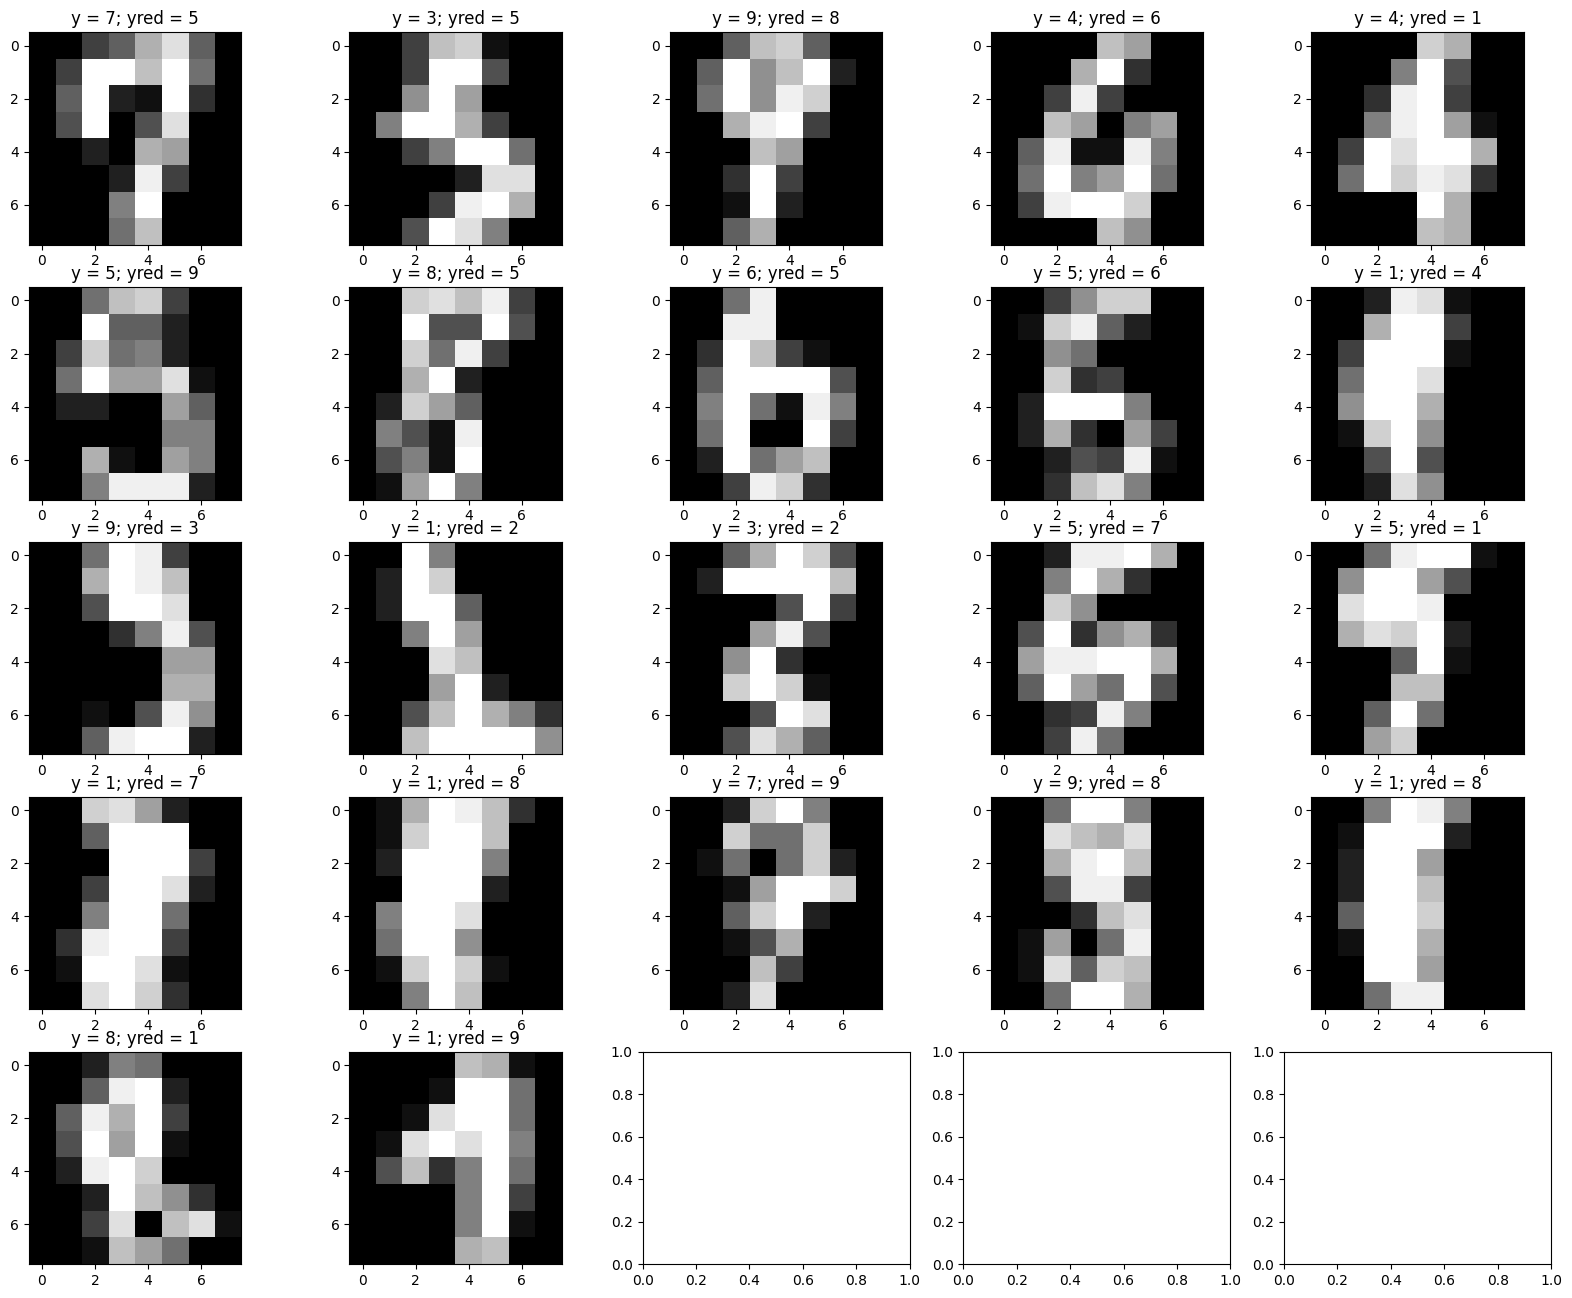

In [ ]:
mask = yte != ypred
draw_sample_label(xte[mask], yte[mask], size = len(xte[mask]), yred=ypred[mask])